Bibliotecas

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import zscore
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo, FactorAnalyzer
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

Importando dataset numérico

In [2]:
df = pd.read_csv("../databases/ENEM_2023_FINAL_num.csv")
display(df)

,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,INTERNET_CASA,EST_IDADE,EST_RENDA_PER_CAP,EST_CELULAR_PER_CAP,EST_COMP_PER_CAP,EST_VEICULO_PER_CAP,EST_ELE_DOM_PER_CAP
0,Masculino,Parda,Privada,510.1,483.8,484.5,492.3,520.0,EM incompleto,ES incompleto,True,19.0,2310.002500,2.250,1.000,0.500000,4.750000
1,Feminino,Branca,Estadual,583.3,474.1,564.6,599.3,660.0,EM incompleto,PG incompleto,True,18.0,1188.001000,0.900,0.400,0.000000,1.800000
2,Masculino,Branca,Privada,646.5,620.7,801.6,585.7,740.0,PG completo,PG completo,True,18.0,2475.001250,0.750,1.125,0.250000,1.500000
3,Feminino,Branca,Privada,553.4,495.1,605.8,554.6,880.0,PG incompleto,PG incompleto,True,17.0,2475.001250,1.125,0.500,0.250000,2.625000
4,Feminino,Branca,Privada,616.3,589.7,682.8,636.7,860.0,PG incompleto,PG incompleto,True,18.0,3300.001667,1.000,1.000,0.000000,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Masculino,Branca,Privada,609.1,613.6,725.2,570.7,800.0,PG completo,PG completo,True,17.0,4950.000833,0.750,0.750,0.333333,1.500000
9996,Feminino,Parda,Estadual,471.6,488.4,597.6,556.4,820.0,EF-2 incompleto,EF-2 incompleto,True,18.0,742.501250,1.125,0.500,0.250000,1.750000
9997,Feminino,Branca,Privada,579.6,616.6,674.5,627.2,580.0,ES incompleto,ES incompleto,True,18.0,1155.001250,1.125,1.125,0.500000,2.375000
9998,Feminino,Branca,Privada,609.2,595.5,625.0,611.3,620.0,Nunca estudou,PG completo,True,17.0,3135.001250,1.125,0.750,0.750000,3.125000


ETAPA 2 - PLANEJAMENTO DA ANÁLISE FATORIAL (Segundo o livro do Hair)

Selecionando variáveis métricas

In [3]:
var = ['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'EST_IDADE', 'EST_RENDA_PER_CAP','EST_CELULAR_PER_CAP', 'EST_COMP_PER_CAP', 'EST_VEICULO_PER_CAP', 'EST_ELE_DOM_PER_CAP']

df_fatores = df[var].dropna()

ETAPA 3 - TESTE DE SUPOSIÇÕES (Segundo o livro do Hair)

Matriz de correlação

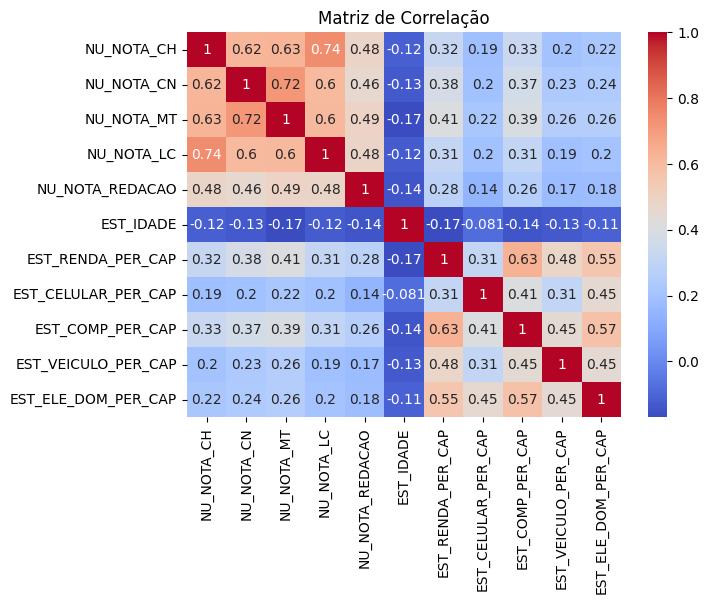

In [4]:
plt.figure(figsize=(7,5))
sns.heatmap(df_fatores.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Teste de Esfericidade de Bartlett

In [5]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_fatores)
print(f"Chi² Bartlett: {chi_square_value:.3f}, p-valor: {p_value:.5f}")

# Se p-valor < 0,05 -> há correlação significativas, ou seja, dá para aplicar a técnica

Chi² Bartlett: 45235.088, p-valor: 0.00000


Medida de adequação da amostra (KMO - geral e MSA - cada var)

In [6]:
kmo_all, kmo_model = calculate_kmo(df_fatores)
print(f"KMO global: {kmo_model:.3f}")

msa_df = pd.DataFrame({'Variável': var, 'MSA': kmo_all})
print("\nMedida de Adequação Amostral (MSA) por variável:")
print(msa_df)

# KMO global >= 0,80 (ótimo)

# MSA individual se < 0,5 (nenhuma precisa ser excluída)

KMO global: 0.877

Medida de Adequação Amostral (MSA) por variável:
               Variável       MSA
0            NU_NOTA_CH  0.852094
1            NU_NOTA_CN  0.882112
2            NU_NOTA_MT  0.880606
3            NU_NOTA_LC  0.852204
4       NU_NOTA_REDACAO  0.949596
5             EST_IDADE  0.935031
6     EST_RENDA_PER_CAP  0.869195
7   EST_CELULAR_PER_CAP  0.874719
8      EST_COMP_PER_CAP  0.877217
9   EST_VEICULO_PER_CAP  0.913701
10  EST_ELE_DOM_PER_CAP  0.852885


Matriz anti-imagem: observar se as correlações parciais são baixas


Matriz Anti-imagem (diagonal = MSA):


,0,1,2,3,4,5,6,7,8,9,10
0,-1.000,0.164,0.160,0.513,0.114,0.015,-0.005,-0.009,0.043,-0.010,0.019
1,0.164,-1.000,0.445,0.140,0.076,0.008,0.055,-0.001,0.045,0.004,-0.011
2,0.160,0.445,-1.000,0.122,0.144,-0.057,0.089,0.019,0.059,0.031,-0.026
3,0.513,0.140,0.122,-1.000,0.129,-0.013,0.012,0.049,-0.003,-0.003,-0.019
4,0.114,0.076,0.144,0.129,-1.000,-0.058,0.039,-0.005,0.013,0.003,-0.002
5,0.015,0.008,-0.057,-0.013,-0.058,-1.000,-0.057,-0.005,-0.017,-0.043,-0.000
6,-0.005,0.055,0.089,0.012,0.039,-0.057,-1.000,-0.041,0.360,0.200,0.247
7,-0.009,-0.001,0.019,0.049,-0.005,-0.005,-0.041,-1.000,0.156,0.085,0.267
8,0.043,0.045,0.059,-0.003,0.013,-0.017,0.360,0.156,-1.000,0.110,0.247
9,-0.010,0.004,0.031,-0.003,0.003,-0.043,0.200,0.085,0.110,-1.000,0.171


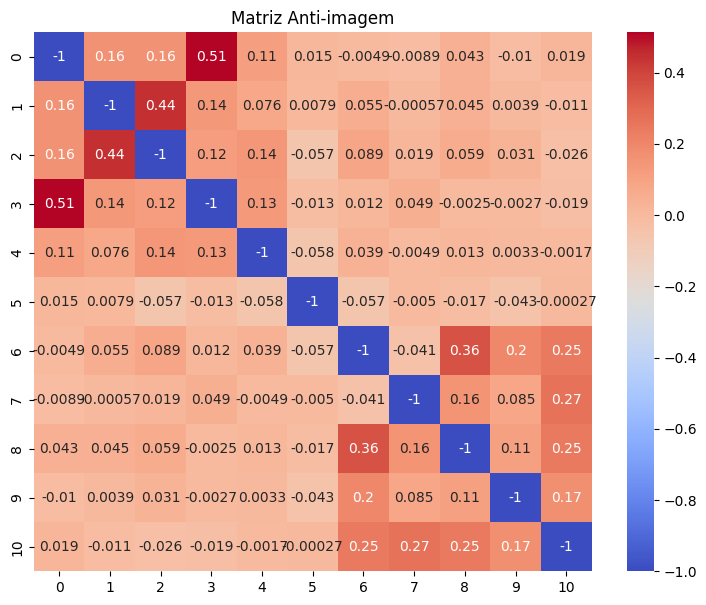

In [7]:
# O módulo factor_analyzer não gera a matriz anti-imagem diretamente.
# Mas podemos obtê-la a partir da inversa da matriz de correlação:
corr_matrix = df_fatores.corr()
inv_corr = np.linalg.inv(corr_matrix)
anti_image = -inv_corr / np.sqrt(np.outer(np.diag(inv_corr), np.diag(inv_corr)))

# A diagonal da anti-imagem é a MSA
anti_image_diag = pd.Series(np.diag(anti_image), index=corr_matrix.columns)
print("\nMatriz Anti-imagem (diagonal = MSA):")
display(pd.DataFrame(anti_image.round(3)))

# Conferir se as correlações parciais (fora da diagonal) são baixas
plt.figure(figsize=(9,7))
sns.heatmap(anti_image, annot=True, cmap='coolwarm')
plt.title('Matriz Anti-imagem')
plt.show()

Verificar normalidade

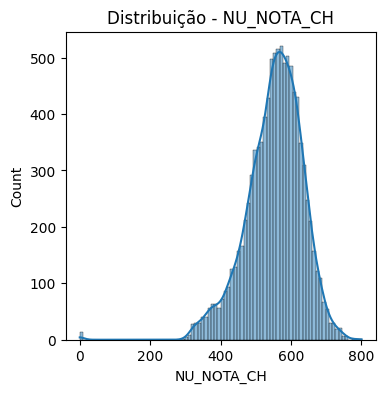

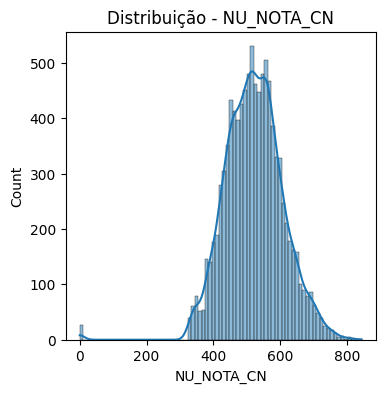

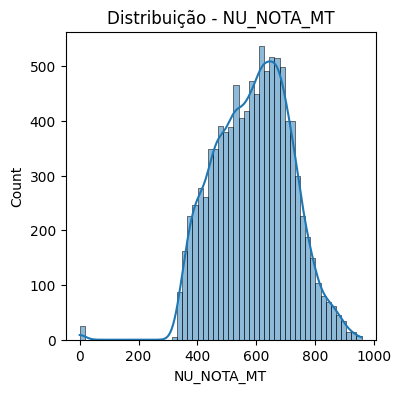

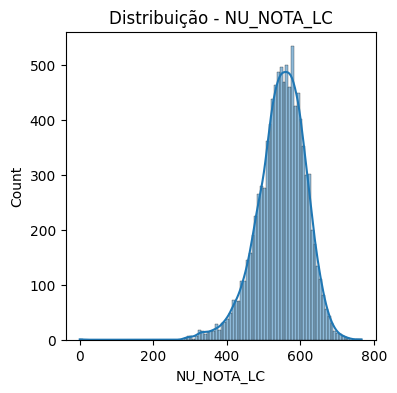

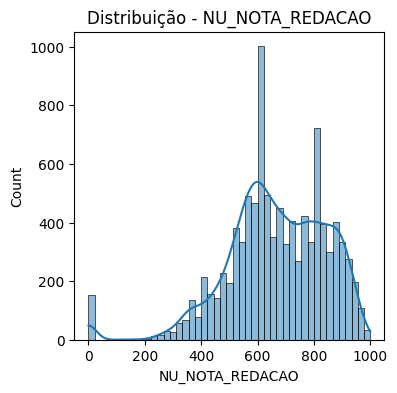

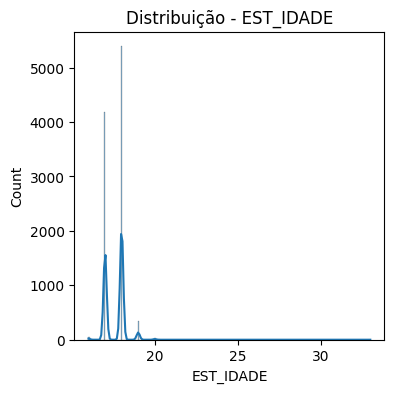

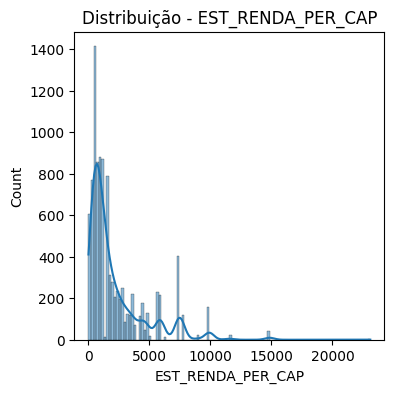

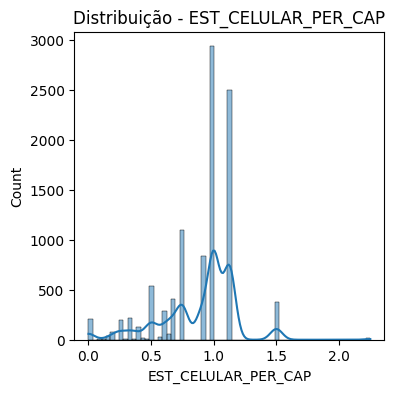

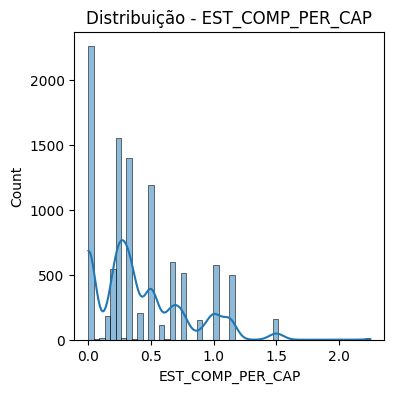

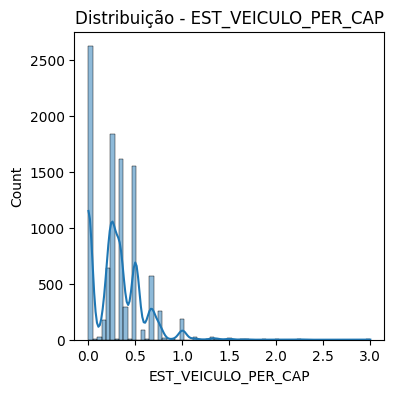

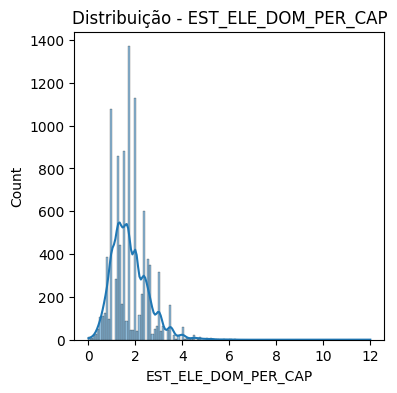

                                Variável  Assimetria    Curtose
NU_NOTA_CH                    NU_NOTA_CH   -0.861023   3.024701
NU_NOTA_CN                    NU_NOTA_CN   -0.339263   2.892660
NU_NOTA_MT                    NU_NOTA_MT   -0.163339   0.260542
NU_NOTA_LC                    NU_NOTA_LC   -0.647479   1.591976
NU_NOTA_REDACAO          NU_NOTA_REDACAO   -0.811587   1.520022
EST_IDADE                      EST_IDADE    1.942927  42.351139
EST_RENDA_PER_CAP      EST_RENDA_PER_CAP    2.091753   5.475282
EST_CELULAR_PER_CAP  EST_CELULAR_PER_CAP   -0.620542   1.464065
EST_COMP_PER_CAP        EST_COMP_PER_CAP    1.003850   0.864734
EST_VEICULO_PER_CAP  EST_VEICULO_PER_CAP    1.513407   6.769220
EST_ELE_DOM_PER_CAP  EST_ELE_DOM_PER_CAP    1.228876   5.007144
NU_NOTA_CH: p-valor = 0.00000
NU_NOTA_CN: p-valor = 0.00072
NU_NOTA_MT: p-valor = 0.00000
NU_NOTA_LC: p-valor = 0.00000
NU_NOTA_REDACAO: p-valor = 0.00000
EST_IDADE: p-valor = 0.00000
EST_RENDA_PER_CAP: p-valor = 0.00000
EST_CELULAR

In [8]:
for col in df_fatores.columns:
    plt.figure(figsize=(4,4))
    sns.histplot(df_fatores[col], kde=True)
    plt.title(f'Distribuição - {col}')
    plt.show()

# --- Assimetria e Curtose ---
normalidade = pd.DataFrame({
    'Variável': df_fatores.columns,
    'Assimetria': df_fatores.skew(),
    'Curtose': df_fatores.kurtosis()
})
print(normalidade)

# --- Teste de normalidade (Kolmogorov-Smirnov) ---
# (opcional, já que a amostra é grande)
for col in df_fatores.columns:
    ks_stat, p = stats.kstest(
        (df_fatores[col] - df_fatores[col].mean()) / df_fatores[col].std(), 'norm'
    )
    print(f'{col}: p-valor = {p:.5f}')

Verificar linearidade 

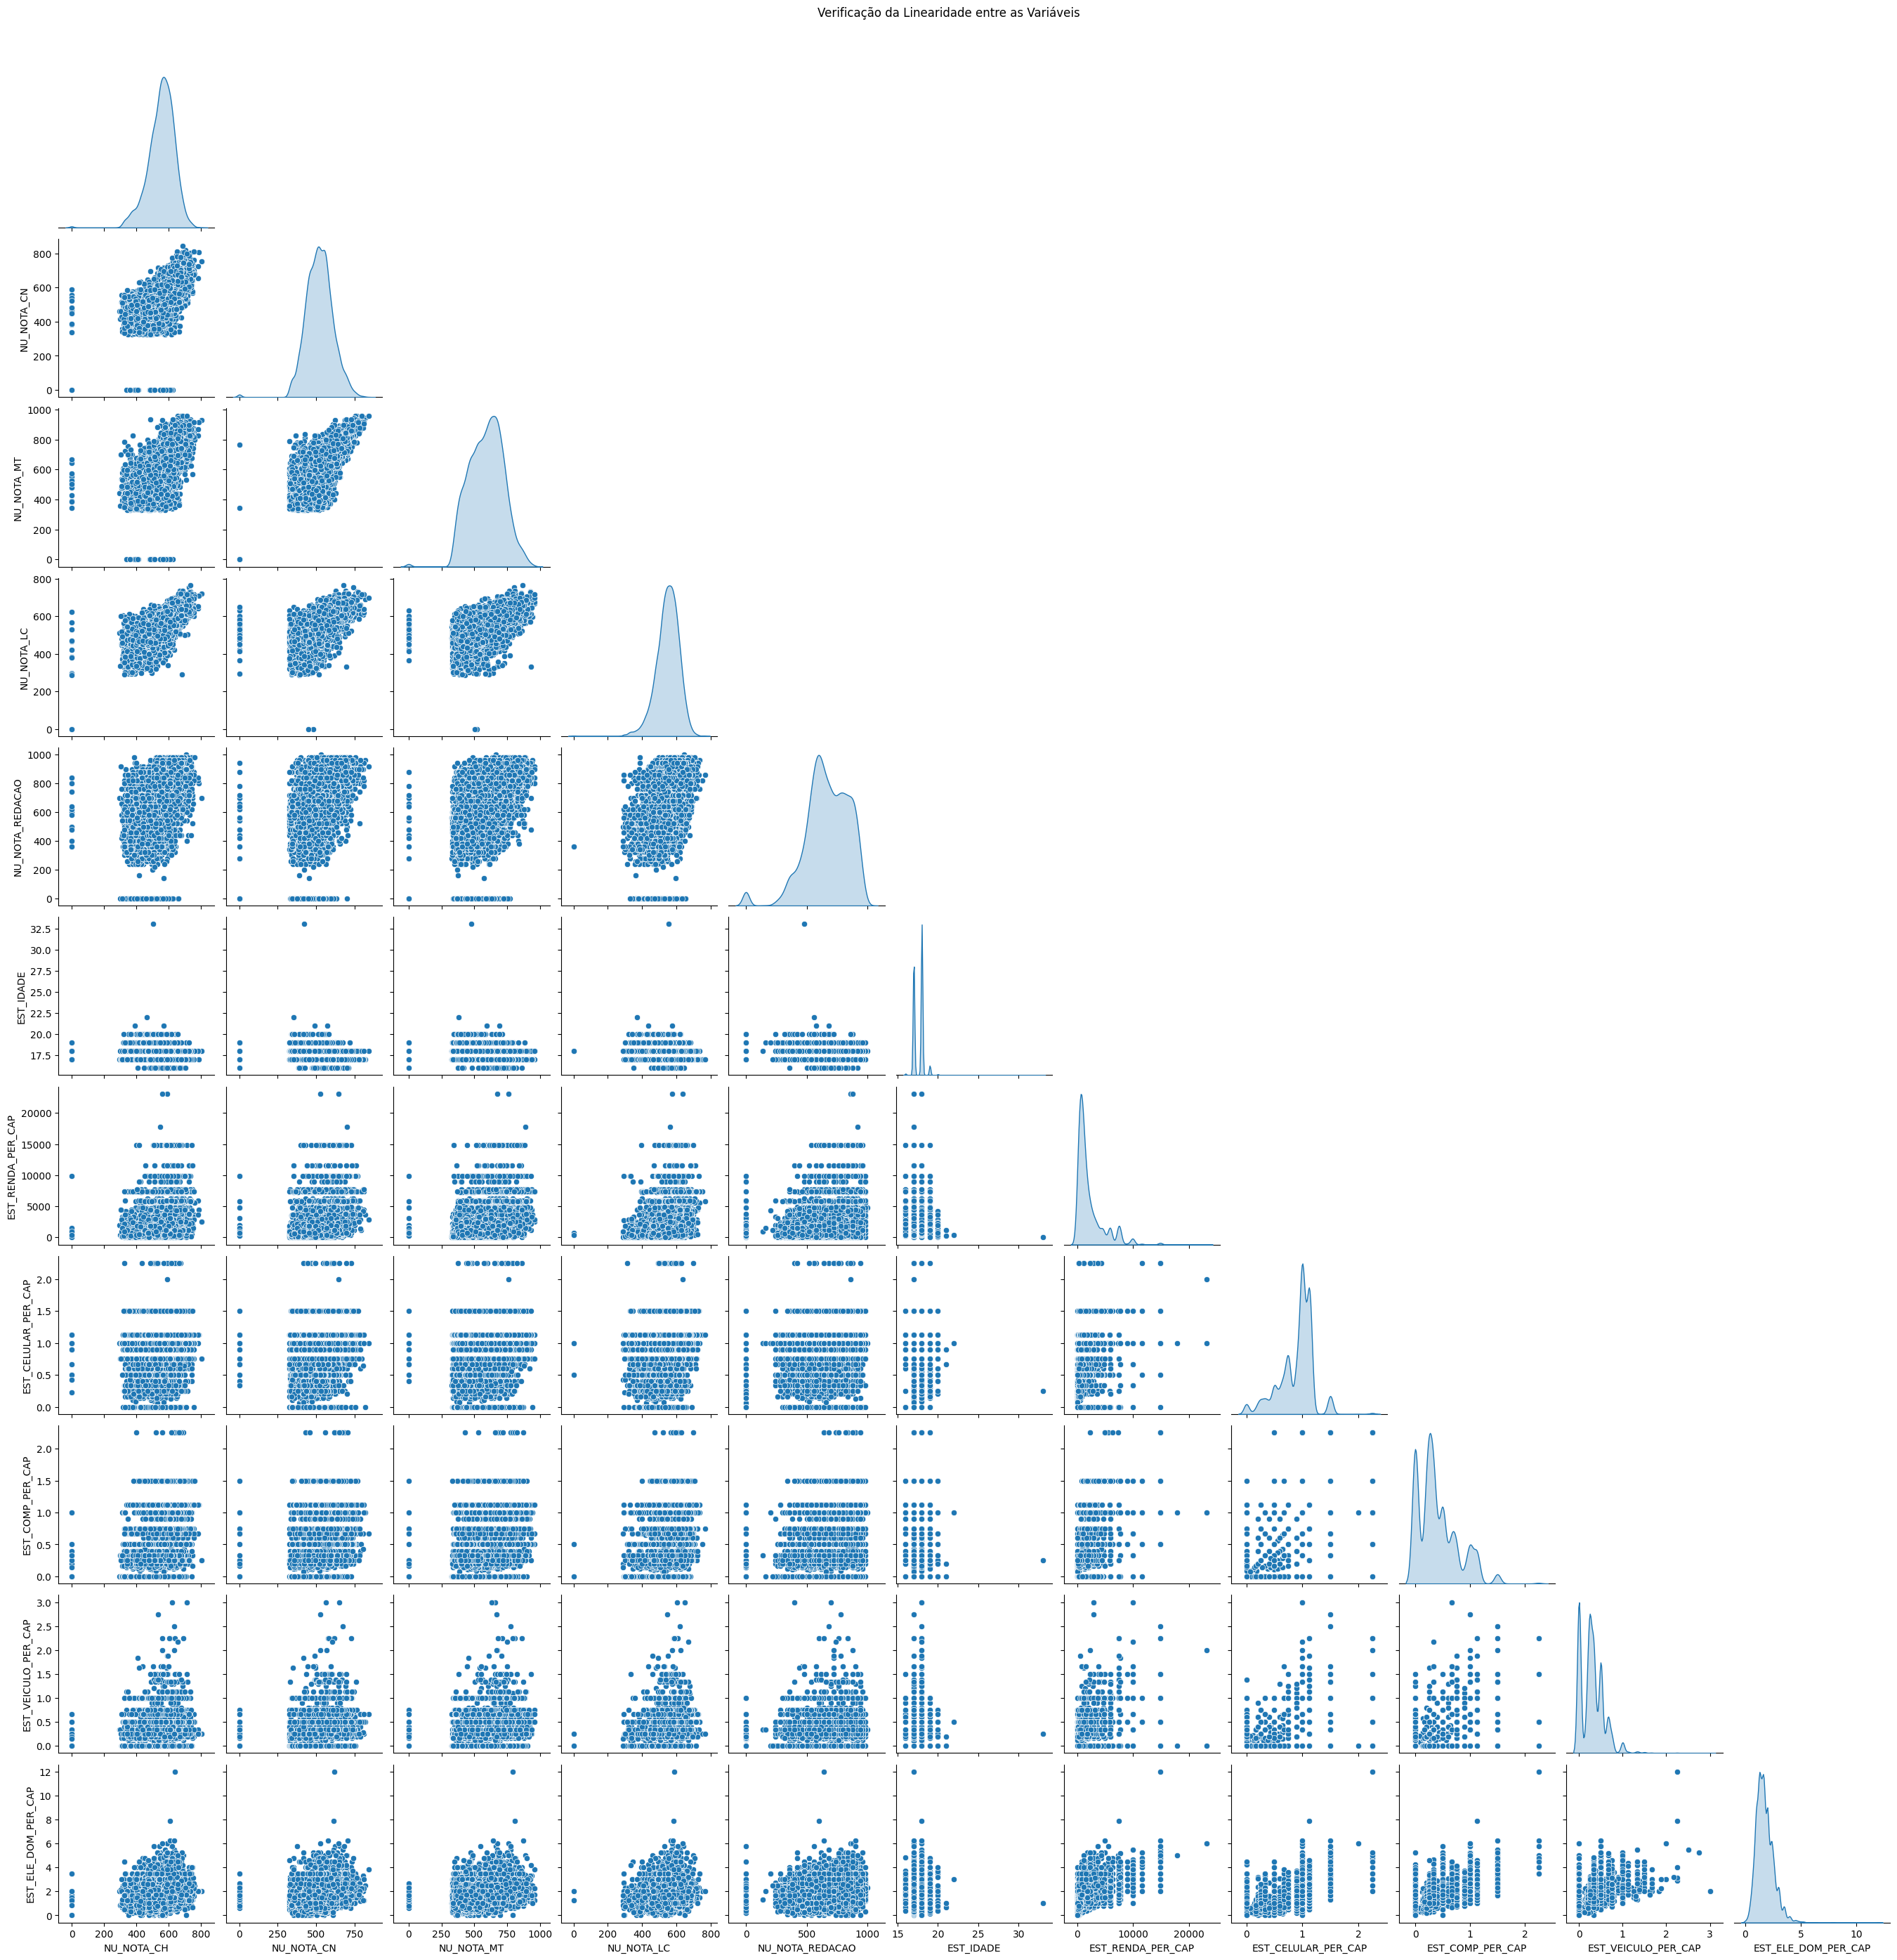

In [9]:
sns.pairplot(df_fatores, diag_kind='kde', corner=True)
plt.suptitle("Verificação da Linearidade entre as Variáveis", y=1.02)
plt.show()

Verificar homoscedasticidade 

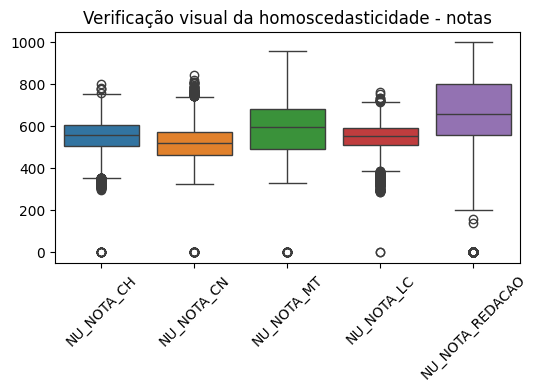

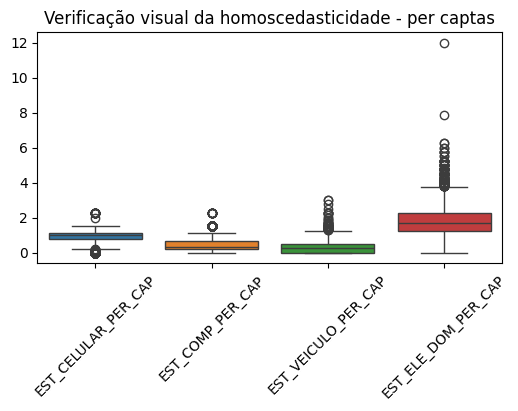

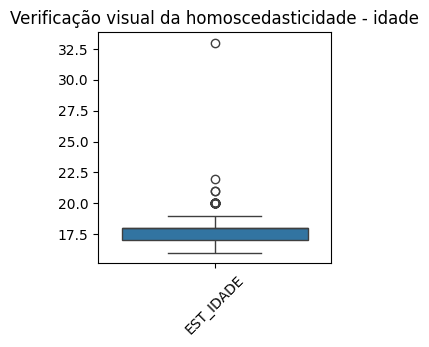

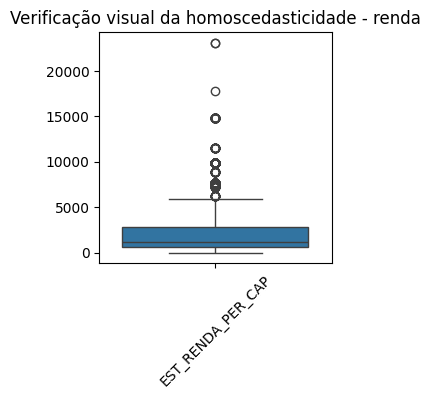

In [10]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df_fatores[['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']])
plt.title('Verificação visual da homoscedasticidade - notas')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,3))
sns.boxplot(data=df_fatores[['EST_CELULAR_PER_CAP', 'EST_COMP_PER_CAP', 'EST_VEICULO_PER_CAP', 'EST_ELE_DOM_PER_CAP']])
plt.title('Verificação visual da homoscedasticidade - per captas')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(3,3))
sns.boxplot(data=df_fatores[['EST_IDADE']])
plt.title('Verificação visual da homoscedasticidade - idade')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(3,3))
sns.boxplot(data=df_fatores[['EST_RENDA_PER_CAP']])
plt.title('Verificação visual da homoscedasticidade - renda')
plt.xticks(rotation=45)
plt.show()

ETAPA 4 - EXTRAÇÃO DE FATORES (Segundo o livro do Hair)

Padronização dos dados

In [11]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_fatores), columns=df_fatores.columns)

Extração de fatores - PCA

Componente 1: autovalor = 4.501
Componente 2: autovalor = 1.800
Componente 3: autovalor = 0.960
Componente 4: autovalor = 0.739
Componente 5: autovalor = 0.609
Componente 6: autovalor = 0.590
Componente 7: autovalor = 0.494
Componente 8: autovalor = 0.415
Componente 9: autovalor = 0.353
Componente 10: autovalor = 0.282
Componente 11: autovalor = 0.257


c:\Users\nicol\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


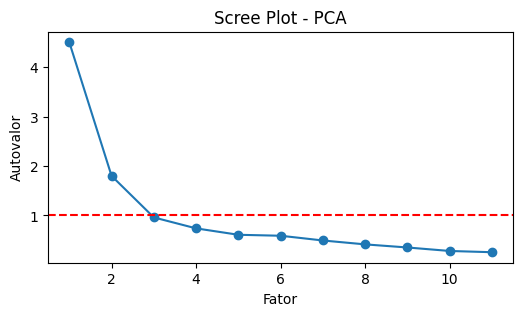

,Fator,Autovalor,Variância (%),Variância acumulada (%)
0,1,4.501361,40.921467,40.921467
1,2,1.799665,16.360594,57.282060
2,3,0.960125,8.728408,66.010468
3,4,0.738833,6.716667,72.727135
4,5,0.609396,5.539961,78.267095
5,6,0.589830,5.362089,83.629184
6,7,0.494035,4.491224,88.120408
7,8,0.415309,3.775540,91.895947
8,9,0.352548,3.204984,95.100931
9,10,0.282057,2.564155,97.665086


In [12]:
# --- PCA usando FactorAnalyzer ---
pca = FactorAnalyzer(n_factors=df_scaled.shape[1], method='principal', rotation=None)
pca.fit(df_scaled)

# --- Autovalores (Eigenvalues) ---
ev, v = pca.get_eigenvalues()

# Exibir autovalores
for i, val in enumerate(ev, 1):
    print(f"Componente {i}: autovalor = {val:.3f}")

# --- Scree Plot ---
plt.figure(figsize=(6,3))
plt.scatter(range(1, df_scaled.shape[1]+1), ev)
plt.plot(range(1, df_scaled.shape[1]+1), ev)
plt.title('Scree Plot - PCA')
plt.xlabel('Fator')
plt.ylabel('Autovalor')
plt.axhline(1, color='red', linestyle='--')
plt.show()

# Variância explicada
var_exp = pd.DataFrame({
    'Fator': np.arange(1, len(ev)+1),
    'Autovalor': ev,
    'Variância (%)': (ev / sum(ev)) * 100,
    'Variância acumulada (%)': np.cumsum((ev / sum(ev)) * 100)
})
display(var_exp)

Extração de fatores - FA

In [13]:
# --- FA (Factor Analysis) ---
fa = FactorAnalyzer(n_factors=3, method='minres', rotation=None)
fa.fit(df_scaled)

# --- Autovalores e variância explicada (FA) ---
ev_fa, v_fa = fa.get_eigenvalues()
print(f"Autovalores FA: {ev_fa}")

# Variância explicada
fa_var = pd.DataFrame({
    'Fator': np.arange(1, len(ev_fa)+1),
    'Autovalor': ev_fa,
    'Variância (%)': (ev_fa / sum(ev_fa)) * 100,
    'Variância acumulada (%)': np.cumsum((ev_fa / sum(ev_fa)) * 100)
})
display(fa_var)

# Cargas fatoriais
fa = FactorAnalyzer(n_factors=3, method='minres', rotation=None)
fa.fit(df_scaled)

loadings = pd.DataFrame(fa.loadings_, index=df_scaled.columns, columns=[f'Fator {i+1}' for i in range(3)])
display(loadings)

Autovalores FA: [4.50136132 1.79966529 0.96012487 0.73883333 0.60939568 0.58982975
 0.49403459 0.41530937 0.3525482  0.28205705 0.25684054]


c:\Users\nicol\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Fator,Autovalor,Variância (%),Variância acumulada (%)
0,1,4.501361,40.921467,40.921467
1,2,1.799665,16.360594,57.282060
2,3,0.960125,8.728408,66.010468
3,4,0.738833,6.716667,72.727135
4,5,0.609396,5.539961,78.267095
5,6,0.589830,5.362089,83.629184
6,7,0.494035,4.491224,88.120408
7,8,0.415309,3.775540,91.895947
8,9,0.352548,3.204984,95.100931
9,10,0.282057,2.564155,97.665086


c:\Users\nicol\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Fator 1,Fator 2,Fator 3
NU_NOTA_CH,0.736839,-0.389586,0.200830
NU_NOTA_CN,0.733456,-0.297318,-0.172997
NU_NOTA_MT,0.773153,-0.285595,-0.250982
NU_NOTA_LC,0.722574,-0.400027,0.242075
NU_NOTA_REDACAO,0.541992,-0.224454,-0.027193
EST_IDADE,-0.206842,-0.035597,0.072634
EST_RENDA_PER_CAP,0.659753,0.383321,-0.099720
EST_CELULAR_PER_CAP,0.407177,0.316849,0.125237
EST_COMP_PER_CAP,0.664996,0.413585,-0.018361
EST_VEICULO_PER_CAP,0.469669,0.370792,-0.020484


Comparar PCA x FA (Autovalores + Scree Plot)

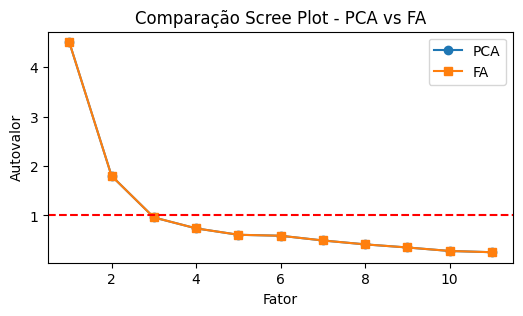

In [14]:
plt.figure(figsize=(6,3))
plt.plot(range(1, len(ev)+1), ev, marker='o', label='PCA')
plt.plot(range(1, len(ev_fa)+1), ev_fa, marker='s', label='FA')
plt.axhline(1, color='red', linestyle='--')
plt.title('Comparação Scree Plot - PCA vs FA')
plt.xlabel('Fator')
plt.ylabel('Autovalor')
plt.legend()
plt.show()
# Isso te permite visualizar se ambos métodos sugerem o mesmo número de fatores.

Percentual total de variância explicada

In [15]:
var_exp_fa = np.sum(fa.get_factor_variance()[1]) * 100
print(f"Variância total explicada pelos fatores: {var_exp_fa:.2f}%")

# O ideal era >= 60%

Variância total explicada pelos fatores: 52.04%


ETAPA 5 - ROTAÇÃO DOS FATORES (Segundo o livro do Hair)

Rotação ortogonal (Varimax)

In [16]:
# --- Análise fatorial com rotação Varimax ---
fa_varimax = FactorAnalyzer(n_factors=3, method='minres', rotation='varimax')
fa_varimax.fit(df_scaled)

# --- Cargas fatoriais ---
loadings_varimax = pd.DataFrame(
    fa_varimax.loadings_,
    index=df_scaled.columns,
    columns=[f'Fator {i+1}' for i in range(3)]
)

print("Matriz fatorial rotacionada - Varimax:")
display(loadings_varimax.round(3))

# --- Comunalidades ---
comunalidades_varimax = pd.Series(fa_varimax.get_communalities(), index=df_scaled.columns)
print("\nComunalidades (Varimax):")
display(comunalidades_varimax.round(3))

# > 0,70         A variável é muito bem explicada pelos fatores.
# 0,50 – 0,69    Explicação moderada, aceitável.
# 0,30 – 0,49    Explicação baixa, variável não se ajusta bem ao modelo.
# < 0,30         A variável não é bem representada → pode ser candidata à exclusão.

Matriz fatorial rotacionada - Varimax:


c:\Users\nicol\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Fator 1,Fator 2,Fator 3
NU_NOTA_CH,0.835,0.186,-0.059
NU_NOTA_CN,0.719,0.211,0.308
NU_NOTA_MT,0.730,0.236,0.392
NU_NOTA_LC,0.837,0.174,-0.102
NU_NOTA_REDACAO,0.549,0.164,0.129
EST_IDADE,-0.123,-0.149,-0.110
EST_RENDA_PER_CAP,0.239,0.697,0.220
EST_CELULAR_PER_CAP,0.124,0.514,-0.048
EST_COMP_PER_CAP,0.236,0.734,0.141
EST_VEICULO_PER_CAP,0.115,0.578,0.107



Comunalidades (Varimax):


NU_NOTA_CH             0.735
NU_NOTA_CN             0.656
NU_NOTA_MT             0.742
NU_NOTA_LC             0.741
NU_NOTA_REDACAO        0.345
EST_IDADE              0.049
EST_RENDA_PER_CAP      0.592
EST_CELULAR_PER_CAP    0.282
EST_COMP_PER_CAP       0.614
EST_VEICULO_PER_CAP    0.358
EST_ELE_DOM_PER_CAP    0.610
dtype: float64

Rotação oblíqua (Promax)

In [17]:
# --- Análise fatorial com rotação Promax ---
fa_promax = FactorAnalyzer(n_factors=3, method='minres', rotation='promax')
fa_promax.fit(df_scaled)

# --- Cargas fatoriais ---
loadings_promax = pd.DataFrame(
    fa_promax.loadings_,
    index=df_scaled.columns,
    columns=[f'Fator {i+1}' for i in range(3)]
)

print("Matriz fatorial rotacionada - Promax:")
display(loadings_promax.round(3))

# --- Comunalidades ---
comunalidades_promax = pd.Series(fa_promax.get_communalities(), index=df_scaled.columns)
print("\nComunalidades (Promax):")
display(comunalidades_promax.round(3))

# Correlação entre fatores (somente na Promax)
corr_fatores = pd.DataFrame(
    fa_promax.phi_,
    index=[f'Fator {i+1}' for i in range(3)],
    columns=[f'Fator {i+1}' for i in range(3)]
)
print("Correlação entre os fatores (Promax):")
display(corr_fatores.round(3))


c:\Users\nicol\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Matriz fatorial rotacionada - Promax:


,Fator 1,Fator 2,Fator 3
NU_NOTA_CH,0.865,0.030,-0.039
NU_NOTA_CN,0.549,-0.061,0.415
NU_NOTA_MT,0.512,-0.070,0.520
NU_NOTA_LC,0.891,0.033,-0.092
NU_NOTA_REDACAO,0.474,-0.001,0.182
EST_IDADE,-0.042,-0.090,-0.135
EST_RENDA_PER_CAP,-0.002,0.618,0.241
EST_CELULAR_PER_CAP,0.052,0.552,-0.090
EST_COMP_PER_CAP,0.028,0.690,0.139
EST_VEICULO_PER_CAP,-0.049,0.562,0.100



Comunalidades (Promax):


NU_NOTA_CH             0.750
NU_NOTA_CN             0.477
NU_NOTA_MT             0.537
NU_NOTA_LC             0.804
NU_NOTA_REDACAO        0.258
EST_IDADE              0.028
EST_RENDA_PER_CAP      0.441
EST_CELULAR_PER_CAP    0.315
EST_COMP_PER_CAP       0.496
EST_VEICULO_PER_CAP    0.328
EST_ELE_DOM_PER_CAP    0.695
dtype: float64

Correlação entre os fatores (Promax):


,Fator 1,Fator 2,Fator 3
Fator 1,1.000,0.397,0.509
Fator 2,0.397,1.000,0.514
Fator 3,0.509,0.514,1.000


Maiores cargas das rotações para melhor visuzalização

In [18]:
# --- Mostrar as maiores cargas (Varimax) ---
loadings_varimax_high = loadings_varimax.applymap(lambda x: x if abs(x) >= 0.4 else '')
print("Cargas fatoriais significativas (≥ 0,4) - Varimax:")
display(loadings_varimax_high)

# --- Mostrar as maiores cargas (Promax) ---
loadings_promax_high = loadings_promax.applymap(lambda x: x if abs(x) >= 0.4 else '')
print("Cargas fatoriais significativas (≥ 0,4) - Promax:")
display(loadings_promax_high)

Cargas fatoriais significativas (≥ 0,4) - Varimax:


C:\Users\nicol\AppData\Local\Temp\ipykernel_99556\34280762.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  loadings_varimax_high = loadings_varimax.applymap(lambda x: x if abs(x) >= 0.4 else '')


,Fator 1,Fator 2,Fator 3
NU_NOTA_CH,0.834823,,
NU_NOTA_CN,0.718979,,
NU_NOTA_MT,0.730151,,
NU_NOTA_LC,0.836708,,
NU_NOTA_REDACAO,0.548965,,
EST_IDADE,,,
EST_RENDA_PER_CAP,,0.69737,
EST_CELULAR_PER_CAP,,0.514115,
EST_COMP_PER_CAP,,0.733509,
EST_VEICULO_PER_CAP,,0.577733,


Cargas fatoriais significativas (≥ 0,4) - Promax:


C:\Users\nicol\AppData\Local\Temp\ipykernel_99556\34280762.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  loadings_promax_high = loadings_promax.applymap(lambda x: x if abs(x) >= 0.4 else '')


,Fator 1,Fator 2,Fator 3
NU_NOTA_CH,0.864662,,
NU_NOTA_CN,0.548843,,0.414747
NU_NOTA_MT,0.512039,,0.519544
NU_NOTA_LC,0.891412,,
NU_NOTA_REDACAO,0.473664,,
EST_IDADE,,,
EST_RENDA_PER_CAP,,0.618355,
EST_CELULAR_PER_CAP,,0.551531,
EST_COMP_PER_CAP,,0.689966,
EST_VEICULO_PER_CAP,,0.561793,


Gráficos para facilitar a visualização das comunalidades de Varimax e Promax

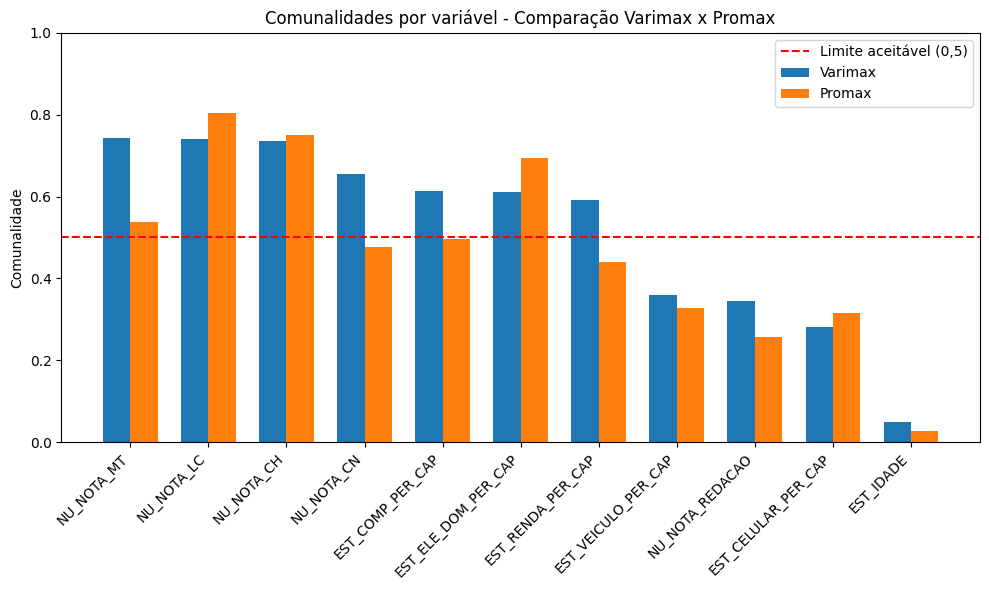

In [19]:
# --- Criar DataFrame com comunalidades das duas rotações ---
comunalidades_df = pd.DataFrame({
    'Varimax': comunalidades_varimax,
    'Promax': comunalidades_promax
})

# --- Ordenar por Varimax (para deixar o gráfico mais organizado) ---
comunalidades_df = comunalidades_df.sort_values('Varimax', ascending=False)

# --- Gráfico de barras lado a lado ---
x = np.arange(len(comunalidades_df))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, comunalidades_df['Varimax'], width, label='Varimax')
plt.bar(x + width/2, comunalidades_df['Promax'], width, label='Promax')

plt.axhline(0.5, color='red', linestyle='--', label='Limite aceitável (0,5)')
plt.title('Comunalidades por variável - Comparação Varimax x Promax')
plt.ylabel('Comunalidade')
plt.xticks(x, comunalidades_df.index, rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

Gráfico com rotações

C:\Users\nicol\AppData\Local\Temp\ipykernel_99556\699684611.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings['Fator 1'][i]+0.02, loadings['Fator 2'][i], var, fontsize=9)


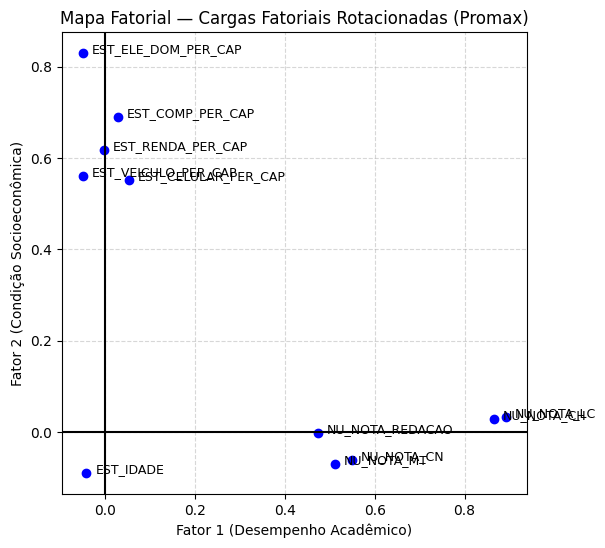

In [20]:
# 'fa_promax' é o modelo final, temos 3 fatores
loadings = pd.DataFrame(fa_promax.loadings_, 
                        index=df_scaled.columns, 
                        columns=['Fator 1', 'Fator 2', 'Fator 3'])

# Plotar Fator 1 x Fator 2
plt.figure(figsize=(6,6))
plt.scatter(loadings['Fator 1'], loadings['Fator 2'], color='blue')

# Adicionar rótulos das variáveis
for i, var in enumerate(loadings.index):
    plt.text(loadings['Fator 1'][i]+0.02, loadings['Fator 2'][i], var, fontsize=9)

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Fator 1 (Desempenho Acadêmico)')
plt.ylabel('Fator 2 (Condição Socioeconômica)')
plt.title('Mapa Fatorial — Cargas Fatoriais Rotacionadas (Promax)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

ETAPA 6 - INTERPRETANDO OS DADOS (Segundo o livro do Hair - Vide relatório para mais informações)

ETAPA 7 - VALIDAÇÃO (Segundo o livro do Hair)

Calcular escores fatoriais

In [21]:
# --- Calcular escores fatoriais (usando Promax) ---
fatores_scores = fa_promax.transform(df_scaled)

# --- Criar DataFrame com escores ---
fatores_df = pd.DataFrame(
    fatores_scores,
    columns=[f'Fator {i+1}' for i in range(fa_promax.n_factors)]
)

print("Escores fatoriais (primeiras linhas):")
display(fatores_df.head())

Escores fatoriais (primeiras linhas):


c:\Users\nicol\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Fator 1,Fator 2,Fator 3
0,-0.694432,2.375099,-0.507799
1,0.334380,-0.214020,-0.645297
2,1.095852,0.443642,1.276148
3,0.124601,0.589683,0.076642
4,1.117064,0.486333,0.558503


Calcular o Alfa de Cronbach (Confiabilidade Interna)

In [22]:
def cronbach_alpha(df):
    df_standardized = df.apply(zscore)
    item_variances = df_standardized.var(axis=0, ddof=1)
    total_variance = df_standardized.sum(axis=1).var(ddof=1)
    n_items = df_standardized.shape[1]
    alpha = (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)
    return alpha

fator1_vars = ['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']  # Desempenho
fator2_vars = ['EST_RENDA_PER_CAP','EST_CELULAR_PER_CAP', 'EST_COMP_PER_CAP', 'EST_VEICULO_PER_CAP', 'EST_ELE_DOM_PER_CAP']  # Socioeconômico
fator3_vars = ['EST_IDADE']  # Perfil individual

# --- Alfa de Cronbach para cada fator ---
alpha_f1 = cronbach_alpha(df_scaled[fator1_vars])
alpha_f2 = cronbach_alpha(df_scaled[fator2_vars])
# fator3 tem apenas uma variável → alfa não é aplicável

print(f"Alfa de Cronbach - Fator 1 (Desempenho Acadêmico): {alpha_f1:.3f}")
print(f"Alfa de Cronbach - Fator 2 (Condição Socioeconômica): {alpha_f2:.3f}")
print("Fator 3 (Idade) contém apenas uma variável, portanto o alfa não se aplica.")


Alfa de Cronbach - Fator 1 (Desempenho Acadêmico): 0.874
Alfa de Cronbach - Fator 2 (Condição Socioeconômica): 0.811
Fator 3 (Idade) contém apenas uma variável, portanto o alfa não se aplica.
